# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
from api_keys import g_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1



print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : hasaki
City not found. Skipping...
Processing Record 2 of Set 1 : albany
City not found. Skipping...
Processing Record 3 of Set 1 : comodoro rivadavia
Processing Record 4 of Set 1 : hilo
City not found. Skipping...
Processing Record 5 of Set 1 : lethem
Processing Record 6 of Set 1 : vila velha
Processing Record 7 of Set 1 : mozarlandia
Processing Record 8 of Set 1 : port alfred
Processing Record 9 of Set 1 : punta arenas
Processing Record 10 of Set 1 : rikitea
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : cottbus
Processing Record 13 of Set 1 : jamestown
Processing Record 14 of Set 1 : watsa
Processing Record 15 of Set 1 : atuona
City not found. Skipping...
Processing Record 16 of Set 1 : hobyo
Processing Record 17 of Set 1 : bandarbeyla
Processing Record 18 of Set 1 : busselton
Processing Record 19 of Set 1 : ribeira grande
Processing Record 20 of Set 1 : okhotsk
Processing

Processing Record 33 of Set 4 : mariental
Processing Record 34 of Set 4 : soyo
Processing Record 35 of Set 4 : smidovich
Processing Record 36 of Set 4 : ada
City not found. Skipping...
Processing Record 37 of Set 4 : huambo
Processing Record 38 of Set 4 : camopi
Processing Record 39 of Set 4 : asau
City not found. Skipping...
Processing Record 40 of Set 4 : port lincoln
Processing Record 41 of Set 4 : buckeye
Processing Record 42 of Set 4 : tambura
Processing Record 43 of Set 4 : kurtalan
Processing Record 44 of Set 4 : kavieng
Processing Record 45 of Set 4 : faanui
Processing Record 46 of Set 4 : bonoua
Processing Record 47 of Set 4 : iqaluit
Processing Record 48 of Set 4 : tessalit
Processing Record 49 of Set 4 : luderitz
Processing Record 50 of Set 4 : otane
Processing Record 0 of Set 5 : krivodanovka
Processing Record 1 of Set 5 : deputatskiy
Processing Record 2 of Set 5 : lithakia
Processing Record 3 of Set 5 : klaksvik
Processing Record 4 of Set 5 : odessa
Processing Record 5 of 

Processing Record 19 of Set 8 : geraldton
Processing Record 20 of Set 8 : monteiro
Processing Record 21 of Set 8 : saint-medard-en-jalles
Processing Record 22 of Set 8 : tukrah
Processing Record 23 of Set 8 : turkistan
Processing Record 24 of Set 8 : mbanza-ngungu
Processing Record 25 of Set 8 : walvis bay
Processing Record 26 of Set 8 : esmeralda
Processing Record 27 of Set 8 : chimbarongo
Processing Record 28 of Set 8 : ixtapa
Processing Record 29 of Set 8 : kutum
Processing Record 30 of Set 8 : talara
Processing Record 31 of Set 8 : kaspiysk
Processing Record 32 of Set 8 : koslan
Processing Record 33 of Set 8 : yar-sale
Processing Record 34 of Set 8 : mestia
Processing Record 35 of Set 8 : abengourou
Processing Record 36 of Set 8 : hamilton
Processing Record 37 of Set 8 : brae
Processing Record 38 of Set 8 : mitu
Processing Record 39 of Set 8 : punta alta
City not found. Skipping...
Processing Record 40 of Set 8 : mianwali
Processing Record 41 of Set 8 : tecpan
Processing Record 42 

Processing Record 4 of Set 12 : coihaique
Processing Record 5 of Set 12 : nishihara
Processing Record 6 of Set 12 : kurilsk
Processing Record 7 of Set 12 : fort frances
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 12 : rock sound
Processing Record 9 of Set 12 : peniche
Processing Record 10 of Set 12 : mamou
Processing Record 11 of Set 12 : koumac
Processing Record 12 of Set 12 : rio grande
Processing Record 13 of Set 12 : vila
Processing Record 14 of Set 12 : mehamn
Processing Record 15 of Set 12 : ciego de avila
Processing Record 16 of Set 12 : ahipara
Processing Record 17 of Set 12 : tura
Processing Record 18 of Set 12 : payakumbuh
Processing Record 19 of Set 12 : sandwick
Processing Record 20 of Set 12 : lukovetskiy
Processing Record 21 of Set 12 : ushtobe
Processing Record 22 of Set 12 : meulaboh
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a datamframe 
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Longitude" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed
0,Hasaki,75,JP,1619321943,43,35.7333,140.8333,72.00,6.91
1,Albany,100,US,1619321769,46,42.6001,-73.9662,53.01,1.83
2,Comodoro Rivadavia,0,AR,1619321944,71,-45.8667,-67.5000,53.60,8.05
3,Hilo,90,US,1619321627,73,19.7297,-155.0900,75.20,4.61
4,Lethem,100,GY,1619321945,91,3.3803,-59.7968,73.98,12.88
...,...,...,...,...,...,...,...,...,...
578,Payakumbuh,44,ID,1619322191,64,-0.2202,100.6308,84.18,1.43
579,Sandwick,20,GB,1619322192,75,60.0000,-1.2500,39.20,3.44
580,Lukovetskiy,40,RU,1619322192,75,64.2956,41.9211,41.00,8.95
581,Ushtobe,52,KZ,1619322192,25,45.2514,77.9838,53.76,5.73


In [14]:
weather_df.to_csv(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\cities.csv", index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

From the above table, no cities showed a humidity greater than 100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

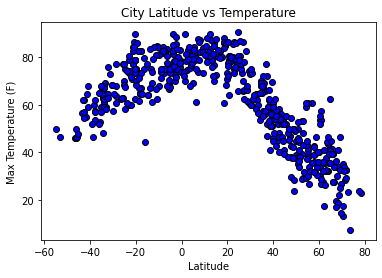

In [29]:
#Create Latitude v Temperature Scatter Plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Max Temperature (F)")

#Title
plt.title("City Latitude vs Temperature")

#Save the plotted figure as png 
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

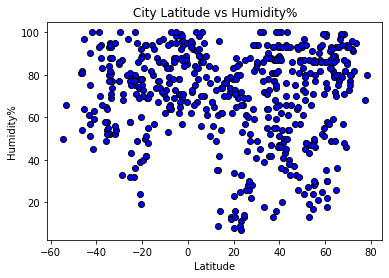

In [31]:
#Create Latitude v Humidity Scatter Plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Humidity%")

#Title
plt.title("City Latitude vs Humidity%")

#Save the plotted figure as png 
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Humidity.png")

## Latitude vs. Cloudiness Plot

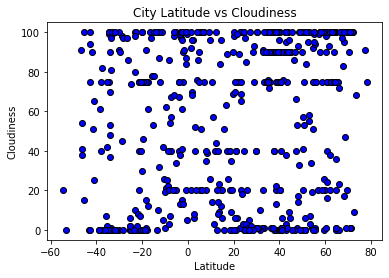

In [33]:
#Create Latitude v Cloudiness Scatter Plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Cloudiness")

#Title
plt.title("City Latitude vs Cloudiness")


plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Cloudiness.png")

## Latitude vs. Wind Speed Plot

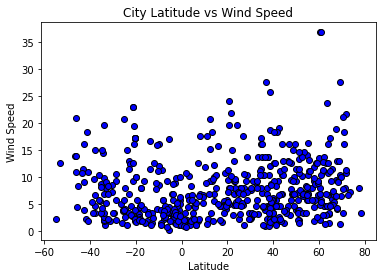

In [34]:
#Create Latitude v Cloudiness Scatter Plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Wind Speed")

#Title
plt.title("City Latitude vs Wind Speed")


plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Wind Speed.png")

## Linear Regression

In [11]:
#Create DF's for nothern and southern 
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

#Line regression & Plot
# can use st.pearsonr from scipy stats to calculate linear regression
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Annotation for linear regression 

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="green")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


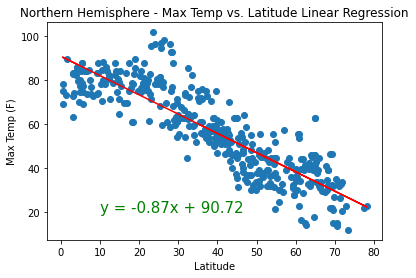

In [19]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# use annotate function 
annotate(equation, 10,20)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.69


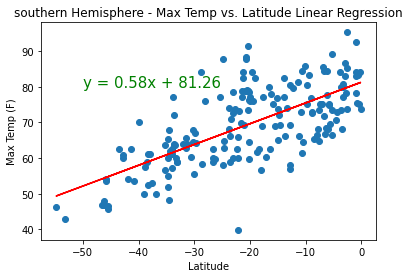

In [21]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# use annotate function 
annotate(equation, -50,80)

# Set a title
plt.title("southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09


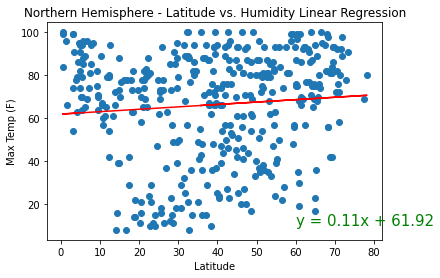

In [31]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# use annotate function 
annotate(equation, 60,10)

# Set a title
plt.title("Northern Hemisphere - Latitude vs. Humidity Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.19


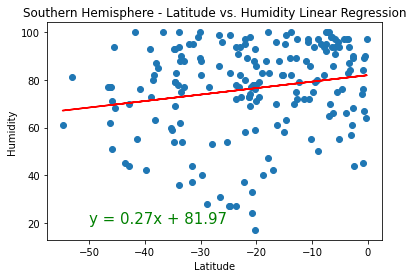

In [33]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# use annotate function 
annotate(equation, -50,20)

# Set a title
plt.title("Southern Hemisphere - Latitude vs. Humidity Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.15


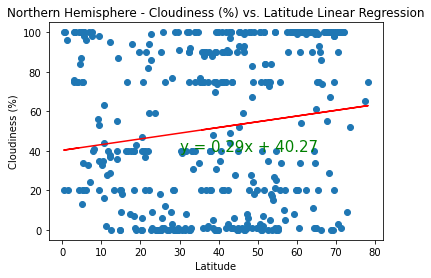

In [40]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# use annotate function 
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.22


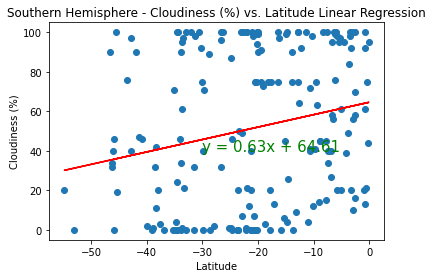

In [41]:

equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
# use annotate function 
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.17


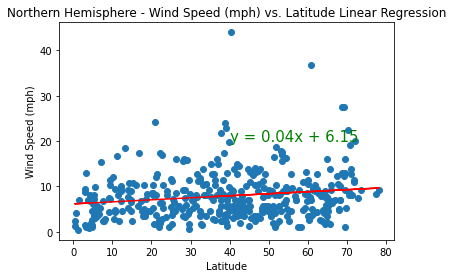

In [42]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
# use annotate function 
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


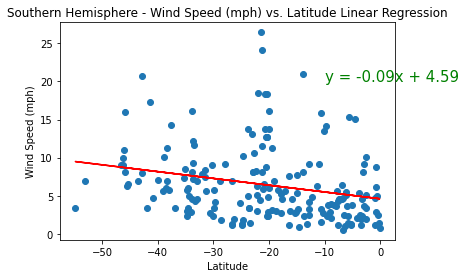

In [43]:

equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# use annotate function 
annotate(equation, -10, 20)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Southern Hemisphere - wind speed vs. Latitude Linear Regression.png")